In [117]:
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [118]:
seed = 42
np.random.seed(seed)

In [119]:
mu = 2.5
std = 3
norm_rv = norm(mu, std)

In [120]:
N = 100
norm_rvs = norm_rv.rvs(N)
norm_rvs, len(norm_rvs)

(array([ 3.99014246,  2.0852071 ,  4.44306561,  7.06908957,  1.79753988,
         1.79758913,  7.23763845,  4.80230419,  1.09157684,  4.12768013,
         1.10974692,  1.10281074,  3.22588681, -3.23984073, -2.6747535 ,
         0.81313741, -0.53849336,  3.442742  , -0.22407223, -1.7369111 ,
         6.89694631,  1.8226711 ,  2.70258461, -1.77424456,  0.86685183,
         2.83276777, -0.95298073,  3.62709406,  0.69808393,  1.62491875,
         0.69488016,  8.05683455,  2.45950833, -0.67313279,  4.96763474,
        -1.16253095,  3.12659079, -3.37901037, -1.48455815,  3.09058371,
         4.71539974,  3.01410484,  2.15305515,  1.59668891, -1.93556597,
         0.34046737,  1.11808369,  5.67136668,  3.53085487, -2.78912047,
         3.47225191,  1.34475316,  0.469234  ,  4.33502887,  5.59299857,
         5.29384036, -0.01765257,  1.57236287,  3.49379029,  5.42663538,
         1.06247729,  1.94302307, -0.81900492, -1.08861987,  4.93757747,
         6.56872009,  2.28396964,  5.51059869,  3.5

In [121]:
mu_rvs = norm_rvs.mean()
var_rvs = norm_rvs.var()
mu_rvs, var_rvs

(2.1884604478177185, 7.348699752244723)

<Axes: >

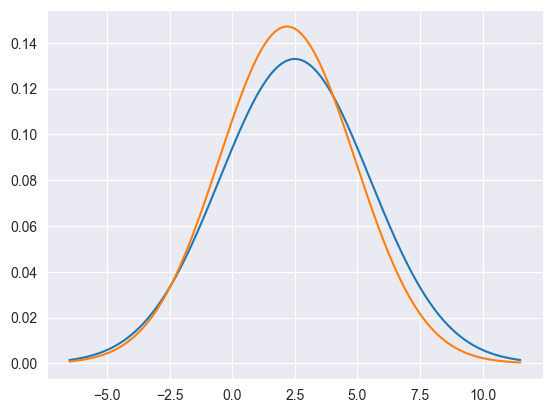

In [122]:
x = np.linspace(norm_rv.mean() - 3 * norm_rv.std(), norm_rv.mean() + 3 * norm_rv.std(), 1000)

sns.lineplot(x=x, y=norm_rv.pdf(x))
sns.lineplot(x=x, y=norm(norm_rvs.mean(), norm_rvs.std()).pdf(x))

In [123]:
bias = norm_rvs.mean() - norm_rv.mean()
mse = bias ** 2 + norm_rvs.var()
bias, mse

(-0.31153955218228147, 7.44575664481866)

In [124]:
alpha = 0.05
p_hat = norm_rvs.mean()
percentile = norm.ppf(1 - alpha / 2)  # Так как оценка параметра mu имеет стандартное нормальное распределение по ЦПТ
print(percentile)
p_d = norm_rvs.std() / np.sqrt(N)

ci_low = p_hat - percentile * p_d
ci_high = p_hat + percentile * p_d
ci_low, ci_high

1.959963984540054


(1.6571438991963414, 2.7197769964390957)

(1.6571438991963414, 2.7197769964390957)


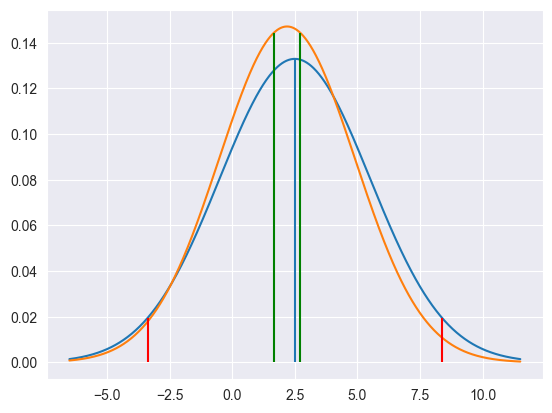

In [125]:
ci = stats.norm.interval(1 - alpha, p_hat, p_d)
print(ci)
sns.lineplot(x=x, y=norm_rv.pdf(x))
sns.lineplot(x=x, y=norm(norm_rvs.mean(), norm_rvs.std()).pdf(x))
plt.vlines(x=ci[0], ymin=0, ymax=norm(norm_rvs.mean(), norm_rvs.std()).pdf(ci[0]), color='g')
plt.vlines(x=ci[1], ymin=0, ymax=norm(norm_rvs.mean(), norm_rvs.std()).pdf(ci[1]), color='g')
plt.vlines(x=norm_rv.ppf(alpha / 2), ymin=0, ymax=norm_rv.pdf(norm_rv.ppf(alpha / 2)), color='r')
plt.vlines(x=norm_rv.ppf(1 - alpha / 2), ymin=0, ymax=norm_rv.pdf(norm_rv.ppf(1 - alpha / 2)), color='r')
plt.vlines(x=norm_rv.mean(), ymin=0, ymax=norm_rv.pdf(norm_rv.mean()))

In [126]:
p = 0.7

binom_rv = binom(N, p)
binom_rvs = binom_rv.rvs(N)
binom_rvs, len(binom_rvs)

bin_m = binom_rvs.mean()
bin_s = binom_rvs.std()
bin_m, bin_s

(70.19, 4.867638030913967)

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
(69.23596047696311, 71.14403952303688)


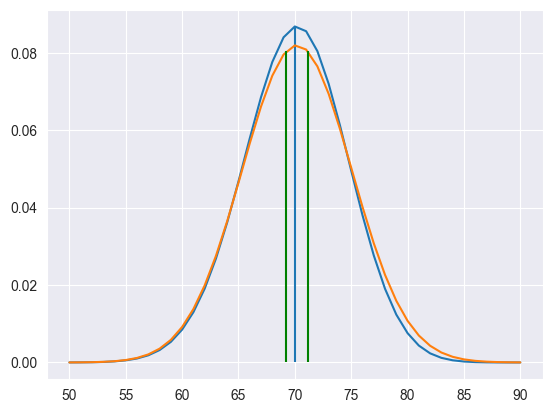

In [127]:
x = [i for i in range(50, 90 + 1)]
print(x)

ci = stats.norm.interval(1 - alpha, binom_rvs.mean(), binom_rvs.std() / np.sqrt(N))  # Оценка матожидания сходится по ЦПТ к нормальному распределению.
print(ci)

sns.lineplot(x=x,
             y=binom_rv.pmf(x))
plt.vlines(x=binom_rv.mean(),
           ymin=0,
           ymax=binom_rv.pmf(binom_rv.mean()))

sns.lineplot(x=x,
             y=norm(binom_rvs.mean(), binom_rvs.std()).pdf(x))
plt.vlines(x=ci[0],
           ymin=0,
           ymax=norm(binom_rvs.mean(), binom_rvs.std()).pdf(ci[0]),
           color='g')
plt.vlines(x=ci[1],
           ymin=0,
           ymax=norm(binom_rvs.mean(), binom_rvs.std()).pdf(ci[1]),
           color='g')

In [128]:
binom_rv.pmf(binom_rv.mean())

0.08678386475342825

In [129]:
print(binom_rv.mean(), binom_rv.std())
print(binom_rvs.mean(), binom_rvs.std())

70.0 4.582575694955841
70.19 4.867638030913967


## А теперь немного магии!
## Что будет, если мы знаем параметр p?

In [130]:
bin_pm = binom_rvs.mean() / p
bin_ps = binom_rvs.std() / (np.sqrt(N) * p)
bin_pm, bin_ps

(100.27142857142857, 0.6953768615591381)